# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data. 
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?


In [38]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [39]:
# Provide your answers here
# load the data
hotel_reviews = pd.read_csv("hotel_reviews.csv")
# show number of records
len(hotel_reviews)

20491

In [40]:
# show distinct classes
classes_number = len(hotel_reviews['Rating'].unique())
classes_number

5

Number of records: 20491 <br>
Number of classes: 5 <br>
Description: <br>
*Review: Content of the review <br>
*Rating: Rating of the hotels with 1 to 5 benchmark


2. Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.


In [41]:
from collections import Counter
import matplotlib.pyplot as plt

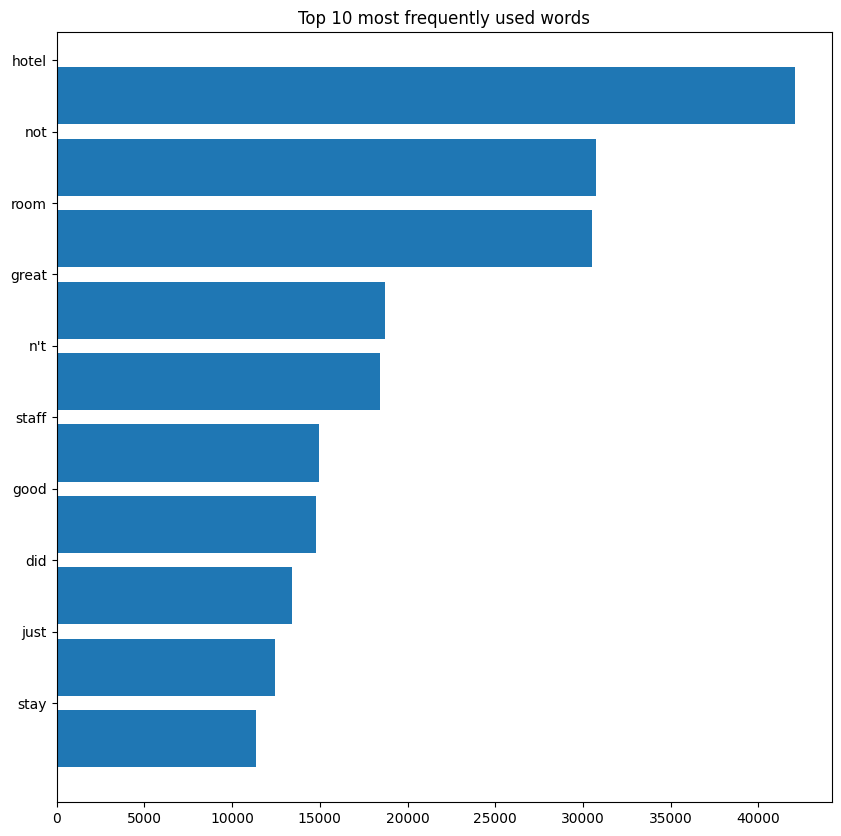

In [42]:
review = [z.lower() for y in
        [x.split() for x in hotel_reviews['Review'] if isinstance(x, str)]
        for z in y]
unique_word_count = dict(Counter(review))
word_frequency = sorted(unique_word_count, key=unique_word_count.get, reverse=True)

top_most_words = 10
plt.figure(figsize=(10, 10))
plt.barh(range(top_most_words), [unique_word_count[w] for w in reversed(word_frequency[:top_most_words])])
plt.yticks([x + 0.5 for x in range(top_most_words)], reversed(word_frequency[:top_most_words]))
plt.title("Top 10 most frequently used words")
plt.show()

In [43]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True



3. Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.

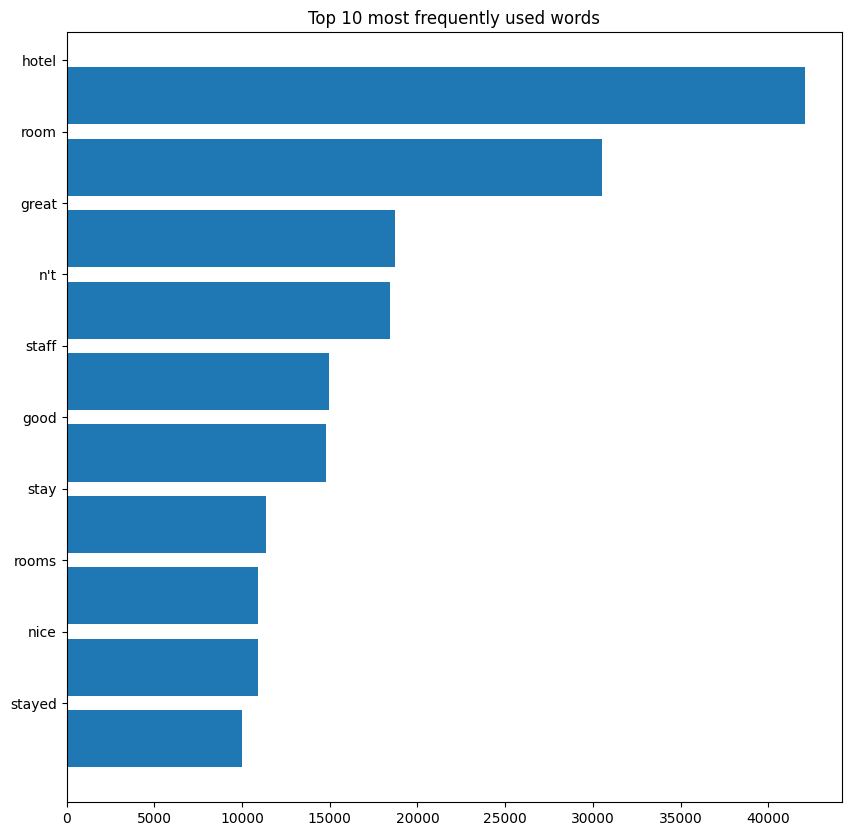

In [44]:
# Provide your answers here
review = [z.lower() for y in
        [x.split() for x in hotel_reviews['Review'] if isinstance(x, str)]
        for z in y]
unique_word_count = dict(Counter(review))
word_frequency = sorted(unique_word_count, key = unique_word_count.get, reverse = True)
popular_words_nonstop = [w for w in word_frequency if w not in stopwords.words("english")]
top_most_words = 10
plt.figure(figsize=(10, 10))
plt.barh(range(top_most_words), [unique_word_count[w] for w in reversed(popular_words_nonstop[:top_most_words])])
plt.yticks([x + 0.5 for x in range(top_most_words)], reversed(popular_words_nonstop[:top_most_words]))
plt.title("Top 10 most frequently used words")
plt.show()


## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [45]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    return text

In [46]:
# Provide your answers here
hotel_reviews['Review'] = hotel_reviews['Review'].apply(clean_data)

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Provide your answers here
random_state = np.random.RandomState(0)
X = hotel_reviews["Review"]
y = hotel_reviews["Rating"]
# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary. 

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [49]:
import copy

In [50]:
# Provide your answers here
y_train_binary = copy.deepcopy(y_train)
y_test_binary = copy.deepcopy(y_test)

y_train_binary[y_train_binary <= 3] = -1  
y_train_binary[y_train_binary >= 4] = 1  

y_test_binary[y_test_binary <= 3] = -1  
y_test_binary[y_test_binary >= 4] = 1



- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Provide your answers here
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the training data
train_data_BOW = vectorizer.fit_transform(X_train)

# Transform the test data
test_data_BOW = vectorizer.transform(X_test)


- Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Provide your answers here
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
train_data_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
test_data_tfidf = tfidf_vectorizer.transform(X_test)

## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Logistic Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

In [53]:
from sklearn.linear_model import LogisticRegression

# Define and train model1 using the Bag of Words (BOW) representation
log_reg = LogisticRegression(random_state=random_state)

log_reg.fit(train_data_BOW, y_train)
y_prediction_model1 = log_reg.predict(test_data_BOW)

log_reg.fit(train_data_tfidf, y_train)
y_prediction_model2 = log_reg.predict(test_data_tfidf)

log_reg.fit(train_data_tfidf, y_train_binary)
y_prediction_model3 = log_reg.predict(test_data_tfidf)


In [54]:
y_prediction_model1

array([2, 2, 5, ..., 4, 5, 5], dtype=int64)

In [55]:
y_prediction_model2

array([2, 4, 5, ..., 5, 5, 5], dtype=int64)

In [56]:
y_prediction_model3

array([-1, -1,  1, ...,  1,  1,  1], dtype=int64)


## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation) and Model 2 (Logistic Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).

In [57]:
from sklearn.metrics import accuracy_score

# Provide your answers here
accuracy_model1 = accuracy_score(y_test, y_prediction_model1)
accuracy_model1

0.567501626545218

* Model 1 (Logistic Regression with BoW representation) has a test accuracy of 56.75%
* Model 2 (Logistic Regression with TfIdf representation) has a test accuracy of 60.88%<br>

According to the percentage, Model 2 with TfIdf representation displays better performance in predicting hotel ratings compared to Model 1 with BoW representation. A higher test accuracy by model 2 indicates its better ability to classify hotel ratings on the test data.

Therefore, using TfIdf representation with Logistic Regression is a more effective approach for predicting hotel ratings compared to using BoW representation.

- Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [58]:
# Provide your answers here
accuracy_model2 = accuracy_score(y_test, y_prediction_model2)
accuracy_model2

0.6088158750813273

In [59]:
accuracy_model3 = accuracy_score(y_test_binary, y_prediction_model3)
accuracy_model3

0.8905335068314899

* Model 2 (Multi-class Rating Prediction)  has a test accuracy of 60.88%
* Model 3 (Binary Sentiment Prediction) has a test accuracy of 89.05%<br>

Analysis: <br>
* According to the percentage, Model 3 with Binary Sentiment Prediction displays better performance with better accuracy in predicting hotel ratings compared to Model 2 with Multi-class Rating Prediction. 
* Model 3 simplifies the problem into two distinct classes, making it relatively easier to distinguish between positive and negative sentiment.
* Model 2 has to categorize reviews into multiple rating categories (e.g., 1-star, 2-star, 3-star). This is a more complex task since it requires the prediction model to differentiate between multiple nuanced categories, especially under imbalanced dataset circumstancce. <br>

Therefore, Binary Sentiment Prediction is an easier and more effective task under this case





- For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

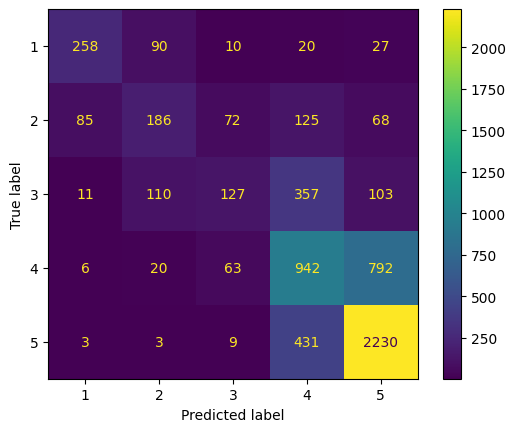

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_prediction_model2)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3,4,5])
display.plot()

In [61]:
print(classification_report(y_test, y_prediction_model2))

              precision    recall  f1-score   support

           1       0.71      0.64      0.67       405
           2       0.45      0.35      0.39       536
           3       0.45      0.18      0.26       708
           4       0.50      0.52      0.51      1823
           5       0.69      0.83      0.76      2676

    accuracy                           0.61      6148
   macro avg       0.56      0.50      0.52      6148
weighted avg       0.59      0.61      0.59      6148



## Task 5: Model Analysis



- Based on the confusion matrix obtained in the previous question (referring to Model 2, the Logistic Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

Number of samples: 27

- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.

Accuracy measure can lead to misleading information or does not provide a detailed outlook under imbalanced dataset circumstance. Under the model 2 with multiple class, accuracy only shows the percentage in majority but can not provide consider the difference of each class imbalances. Therefore, precision and recall can be utilised to provide this information. While precision shows true positives to the total predicted positives, recall indicated ratio of true positives to the total predicted positives.
<br>F1-Score is the combination of precision and recall. It balances the trade-off between the two measures and can be considered as the most suitable evaluation metric for model 2



- For binary sentiment prediction (Model 3), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [62]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

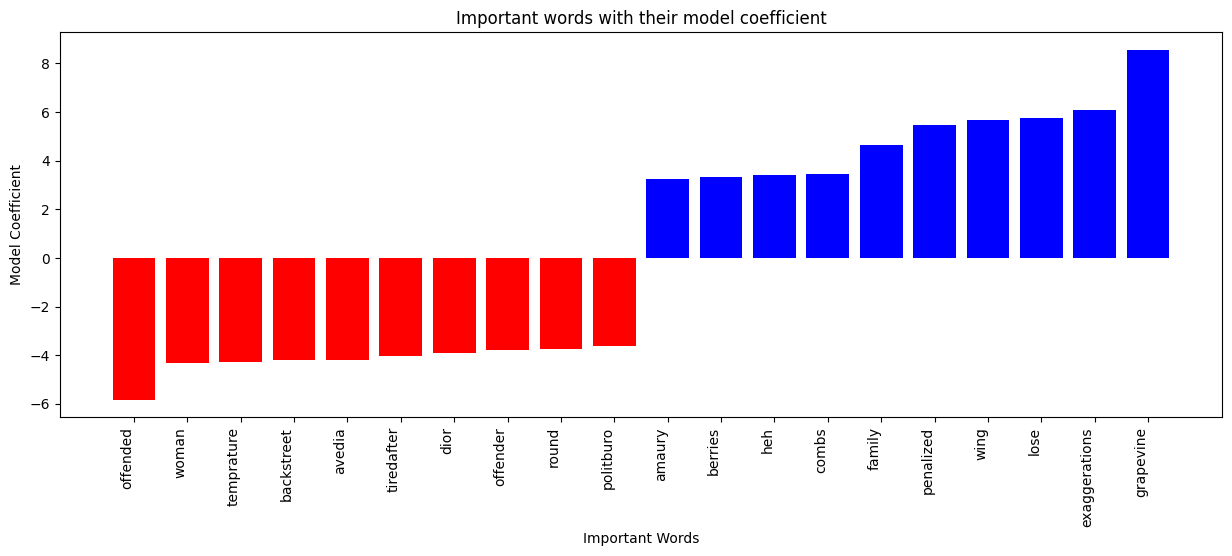

In [63]:
plot_coefficients(log_reg, vectorizer.get_feature_names_out())